## Parte I: Analizando la Base

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
EPH2024 = pd.read_excel('usu_individual_T124.xlsx')
EPH2004 = pd.read_stata("Individual_t104.dta")

#### 2a) Eliminen todas las observaciones que no corresponden a los aglomerados de Ciudad Autónoma de Buenos Aires o Gran Buenos Aires, y unan ambos trimestres en una sola base

In [96]:
EPH2004.columns = EPH2004.columns.str.lower()
EPH2024.columns = EPH2024.columns.str.lower()

EPH2024BS=EPH2024[(EPH2024["aglomerado"] == 32) | (EPH2024["aglomerado"] == 33)]
EPH2004BS=EPH2004[(EPH2004["aglomerado"] == "Ciudad de Buenos Aires") | (EPH2004["aglomerado"] == "Partidos del GBA")]


EPH2004BS["aglomerado"].value_counts()


aglomerado
Partidos del GBA                   5811
Ciudad de Buenos Aires             1836
Gran Rosario                          0
Bahía Blanca - Cerri                  0
Gran La Plata                         0
Posadas                               0
Gran Resistencia                      0
Comodoro Rivadavia - Rada Tilly       0
Gran Mendoza                          0
Corrientes                            0
Gran Córdoba                          0
Gran Santa Fe                         0
Gran Paraná                           0
Formosa                               0
Concordia                             0
Neuquén - Plottier                    0
Santiago del Estero - La Banda        0
Gran Catamarca                        0
Salta                                 0
Jujuy - Palpalá                       0
Río Gallegos                          0
San Luis - El Chorrillo               0
La Rioja                              0
Gran San Juan                         0
Gran Tucumán - Tafí Viejo    

##### Mapeo para igualar la codificación

In [83]:
#region Mapeo
mapeo = {
    'Sí': "1",
    'No': "2",
}

mapeo2 = {
    "Ciudad de Buenos Aires" : "32",
    'Partidos del GBA': "33",
}

mapeo_parentesco = {
    'Jefe': '1',
    'Cónyuge/Pareja': '2',
    'Hijo/Hijastro': '3',
    'Yerno/Nuera': '4',
    'Nieto': '5',
    'Madre/Padre': '6',
    'Suegro': '7',
    'Hermano': '8',
    'Otros Familiares': '9',
    'No Familiares': '10'
}

mapeo_estatus = {
    'Jubilado/pensionado': '1',
    'Rentista': '2',
    'Estudiante': '3',
    'Ama de casa': '4',
    'Menor de 6 años': '5',
    'Discapacitado': '6',
    'Otros': '7'
}

mapeo_cat_ocu = {
    'Patrón': '1',
    'Cuenta propia': '2',
    'Obrero o empleado': '3',
    'Trabajador familiar sin remuneración': '4',
    'Ns./Nr.': '9'
}

mapeo_sexo= {
    'Varón': '1',
    'Mujer': '2',
}

mapeo_estado_civil = {
    'Unido': '1',
    'Casado': '2',
    'Separado o Divorciado': '3',
    'Viudo': '4',
    'Soltero': '5'
}

mapeo_cobertura_medica = {
    'Obra social (incluye PAMI)': '1',
    'Mutual/Prepaga/Servicio de emergencia': '2',
    'Planes y seguros públicos': '3',
    'No paga ni le descuentan': '4',
    'Ns./Nr.': '9',
    'Obra social y mutual/prepaga/servicio de emergencia': '12',
    'Obra social y planes y seguros públicos': '13',
    'Mutual/prepaga/servicio de emergencia/planes y seguros públicos': '23',
    'Obra social, mutual/prepaga/servicio de emergencia y planes y seguros públicos': '123'
}

mapeo_leer= {
    'Sí': '1',
    'No': '2',
    "Menor de 2 años": "3",
    "Ns./Nr.": "0"
}

mapeo_edu= {
    'Sí, asiste': '1',
    'No asiste, pero asistió': '2',
    "Nunca asistió": "3",
    "Ns./Nr.": "9"
}

mapeo_edu2= {
    'Público': '1',
    'Privado': '2',
    "Ns./Nr.": "9"
}

mapeo_establecimiento = {
    'Jardín/Preescolar': '1',
    'Primario': '2',
    'EGB': '3',
    'Secundario': '4',
    'Polimodal': '5',
    'Terciario': '6',
    'Universitario': '7',
    'Posgrado Universitario': '8',
    'Educación especial (discapacitado)': '9',
    'Ns./Nr.': '0',
}

mapeo_edu3= {
    'Sí': '1',
    'No': '2',
    "Ns./Nr.": "9"
}


mapeo_lugar = {
    'En esta localidad': '1',
    'En otra localidad': '2',
    'En otra provincia (especificar)': '3',
    'En un país limítrofe': '4',
    'En otro país': '5',
    'No había nacido': '6',
    'Ns./Nr.': '9',
}

mapeo_nivel_educativo = {
    'Primaria Incompleta (incluye educación especial)': '1',
    'Primaria Completa': '2',
    'Secundaria Incompleta': '3',
    'Secundaria Completa': '4',
    'Superior Universitaria Incompleta': '5',
    'Superior Universitaria Completa': '6',
    'Sin instrucción': '7',
    'Ns./ Nr.': '9'
}

mapeo_cond_actividad = {
    'Entrevista individual no realizada (no respuesta al cuestion': '0',
    'Ocupado': '1',
    'Desocupado': '2',
    'Inactivo': '3',
    'Menor de 10 años': '4',
}

mapeo_m500 = {
    'N': 1,
    'S': 2,
}

#endregion

In [31]:
#region Mapeo2
EPH2004BS["aglomerado"] = EPH2004BS["aglomerado"].map(mapeo2)
EPH2004BS["h15"] = EPH2004BS["h15"].map(mapeo)
EPH2004BS["ch03"] = EPH2004BS["ch03"].map(mapeo_parentesco)
EPH2004BS["cat_inac"] = EPH2004BS["cat_inac"].map(mapeo_estatus)
EPH2004BS["cat_ocup"] = EPH2004BS["cat_ocup"].map(mapeo_cat_ocu)
EPH2004BS["ch04"] = EPH2004BS["ch04"].map(mapeo_sexo)
EPH2004BS["ch07"] = EPH2004BS["ch07"].map(mapeo_estado_civil)
EPH2004BS["ch08"] = EPH2004BS["ch08"].map(mapeo_cobertura_medica)
EPH2004BS["ch09"] = EPH2004BS["ch09"].map(mapeo_leer)
EPH2004BS["ch10"] = EPH2004BS["ch10"].map(mapeo_edu)
EPH2004BS["ch11"] = EPH2004BS["ch11"].map(mapeo_edu2)
EPH2004BS["ch12"] = EPH2004BS["ch12"].map(mapeo_establecimiento)
EPH2004BS["ch13"] = EPH2004BS["ch13"].map(mapeo_edu3)
EPH2004BS["ch15"] = EPH2004BS["ch15"].map(mapeo_lugar)
EPH2004BS["ch16"] = EPH2004BS["ch16"].map(mapeo_lugar)
EPH2004BS["nivel_ed"] = EPH2004BS["nivel_ed"].map(mapeo_nivel_educativo)
EPH2004BS["estado"] = EPH2004BS["estado"].map(mapeo_cond_actividad)

EPH2004BS["trimestre"] = 1
EPH2004BS["region"] = 1
#endregion

C:\Users\gabri\AppData\Local\Temp\ipykernel_20468\3343321540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EPH2004BS["aglomerado"] = EPH2004BS["aglomerado"].map(mapeo2)
C:\Users\gabri\AppData\Local\Temp\ipykernel_20468\3343321540.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EPH2004BS["h15"] = EPH2004BS["h15"].map(mapeo)
C:\Users\gabri\AppData\Local\Temp\ipykernel_20468\3343321540.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

#### Unión

In [38]:
EPH_completo= pd.concat([EPH2004BS, EPH2024BS], ignore_index=True)
EPH_completo["ch04"]

0        1
1        2
2        2
3        1
4        2
        ..
14693    2
14694    1
14695    1
14696    1
14697    2
Name: ch04, Length: 14698, dtype: object

#### 2b) Si hay observaciones con valores que no tienen sentido, descártenlas (por ejemplo, ingresos y edades negativos). Expliquen las decisiones tomadas

In [40]:
EPH_completo["ch06"] = pd.to_numeric(EPH_completo['ch06'], errors='coerce')

# Eliminar filas con NaN en 'columna1'
EPH_completo = EPH_completo.dropna(subset=['ch06'])

# Restablecer el índice (opcional)
EPH_completo.reset_index(drop=True, inplace=True)

print(EPH_completo)

                              codusu  nro_hogar componente h15    ano4  \
0                           125098          1.0        1.0   1  2004.0   
1                           125397          1.0        1.0   1  2004.0   
2                           125515          1.0        1.0   1  2004.0   
3                           125558          1.0        1.0   1  2004.0   
4                           125558          1.0        2.0   1  2004.0   
...                              ...        ...        ...  ..     ...   
14558  TQRMNOPUQHKMKNCDEIJAH00861661        1.0          1   1  2024.0   
14559  TQRMNOPUQHKMKNCDEIJAH00861661        1.0          2   2  2024.0   
14560  TQRMNOPUQHKMKNCDEIJAH00861661        1.0          3   2  2024.0   
14561  TQRMNOPUQHKMKNCDEIJAH00861661        1.0          4   2  2024.0   
14562  TQRMNOPUQHKMKNCDEIJAH00861661        1.0          5   2  2024.0   

       trimestre  region mas_500 aglomerado  pondera  ... adeccfr pj1_1  \
0              1       1       S    

In [34]:
EPH_completo["ch06"].value_counts()

ch06
14.0    260
15.0    259
13.0    256
22.0    254
19.0    248
       ... 
91.0      9
96.0      4
94.0      4
95.0      2
97.0      1
Name: count, Length: 98, dtype: int64

#### 2c) Una vez hecha esa limpieza, realicen un gráfico de barras mostrando la composición por sexo para 2004 y 2024. Comenten los resultados

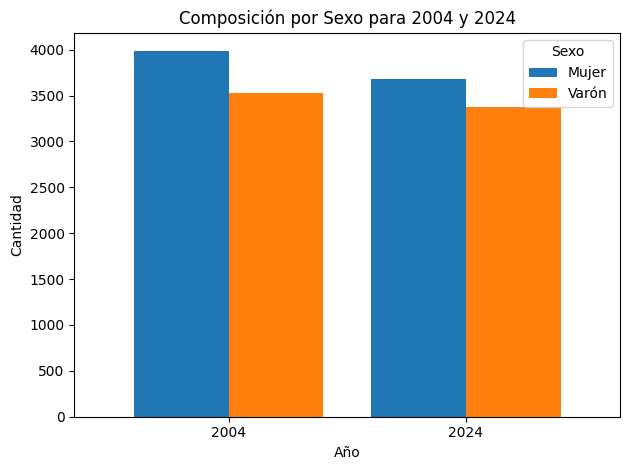

In [35]:
# Contar la cantidad de casos por sexo y año

EPH_completo["ch04"] = EPH_completo["ch04"].astype(int)
EPH_completo["ano4"] = EPH_completo["ano4"].astype(int)

EPH_completo2 = EPH_completo
EPH_completo2["ch04"] = EPH_completo2["ch04"].map({1: 'Varón', 2: 'Mujer'})

conteo = EPH_completo2.groupby(['ano4', 'ch04']).size().unstack(fill_value=0)

# Configuración para el gráfico
conteo.plot(kind='bar', width=0.8)

# Configuración de etiquetas y título
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.title('Composición por Sexo para 2004 y 2024')
plt.xticks(rotation=0)
plt.legend(title='Sexo', )

# Mostrar el gráfico
plt.tight_layout()
plt.show()

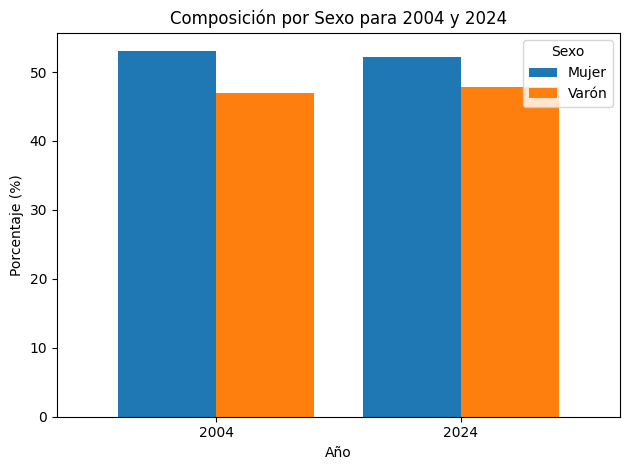

In [36]:
# Calcular el porcentaje
porcentaje = conteo.div(conteo.sum(axis=1), axis=0) * 100

# Configuración para el gráfico
porcentaje.plot(kind='bar', width=0.8)

# Configuración de etiquetas y título
plt.xlabel('Año')
plt.ylabel('Porcentaje (%)')
plt.title('Composición por Sexo para 2004 y 2024')
plt.xticks(rotation=0)
plt.legend(title='Sexo')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

#### 2d) Realicen una matriz de correlación para 2004 y 2024 con las siguientes variables: CH04, CH06, CH07, CH08, NIVEL ED, ESTADO, CAT_INAC, IPCF.

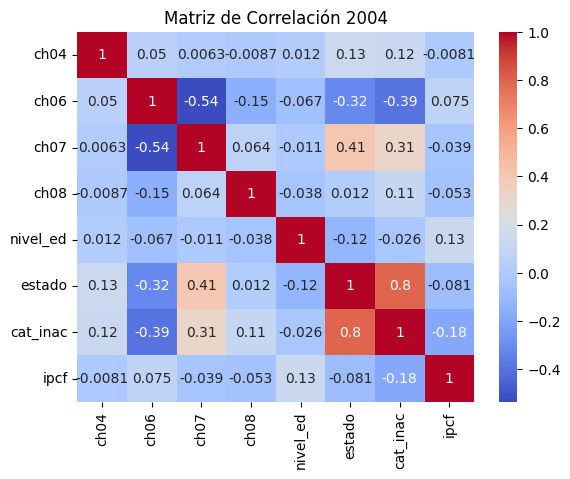

In [41]:
# Seleccionar las variables de interés
variables_interes = ['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf']

# Calcular la matriz de correlación para 2004 y 2024
corr_2004 = EPH_completo[variables_interes].corr()
#corr_2024 = data_2024_filtrado[variables_interes].corr()

# Visualizar las matrices de correlación
sns.heatmap(corr_2004, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación 2004')
plt.show()

#### 2e) ¿Cuántos desocupados hay en la muestra? ¿Cuántos inactivos? ¿Cuál es la media de ingreso per cápita familiar (IPCF) según estado (ocupado, desocupado, inactivo)?

In [44]:
EPH_completo["estado"].value_counts()

estado
1    6302
3    5459
4    1912
2     839
0      51
Name: count, dtype: int64

In [45]:

# Contar el número de desocupados e inactivos

EPH_completo["estado"] = EPH_completo["estado"].astype(int)

desocupados = EPH_completo[EPH_completo['estado'] == 2].shape[0]
inactivos = EPH_completo[EPH_completo['estado'] == 3].shape[0]

# Calcular la media de ingreso per cápita familiar según estado
media_ipcf = EPH_completo.groupby('estado')['ipcf'].mean()

# Imprimir los resultados
print(f'Número de desocupados: {desocupados}')
print(f'Número de inactivos: {inactivos}')
print('Media de ingreso per cápita familiar según estado:')
print(media_ipcf)

Número de desocupados: 839
Número de inactivos: 5459
Media de ingreso per cápita familiar según estado:
estado
0        10.300654
1    106460.207963
2     31655.957950
3     63898.042020
4     44513.603662
Name: ipcf, dtype: float64


#### 3) Uno de los grandes problemas de la EPH es la creciente cantidad de 
hogares que no reportan sus ingresos (ver por ejemplo el siguiente informe). ¿Cuántas personas no respondieron cuál es su condición de actividad? Guarden como una base distinta llamada respondieron las observaciones donde respondieron la pregunta sobre su condición de actividad (ESTADO). Las observaciones con ESTADO=0 guárdenlas en una base bajo el nombre norespondieron.

In [54]:
#aca es general 2004 y 2024, no esta separado por año

# Filtrar las observaciones donde respondieron su condición de actividad (ESTADO ≠ 0)
respondieron = EPH_completo[EPH_completo['estado'] != 0]

# Filtrar las observaciones donde NO respondieron su condición de actividad (ESTADO = 0)
norespondieron = EPH_completo[EPH_completo['estado'] == 0]

# Guardar la cantidad de personas que no respondieron su condición de actividad
cantidad_norespondieron = norespondieron.shape[0]
cantidad_respondieron = respondieron.shape[0]

# Mostrar los resultados
print(f"Cantidad de personas que NO respondieron su condición de actividad: {cantidad_norespondieron}")
print(f"Cantidad de personas que respondieron su condición de actividad: {cantidad_respondieron}")

# Guardar las bases en archivos separados
respondieron.to_csv('respondieron.csv', index=False)
norespondieron.to_csv('norespondieron.csv', index=False)

Cantidad de personas que NO respondieron su condición de actividad: 51
Cantidad de personas que respondieron su condición de actividad: 14512


#### 4)Agreguen a la base respondieron una columna llamada PEA (Población Económicamente Activa) que tome 1 si están ocupados o desocupados en ESTADO. Realicen un gráfico de barras mostrando la composición por PEA para 2004 y 2024. Comenten los resultados.¶

C:\Users\gabri\AppData\Local\Temp\ipykernel_20468\3770805843.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  respondieron['PEA'] = respondieron['estado'].apply(lambda x: 1 if x in [1, 2] else 0)
C:\Users\gabri\AppData\Local\Temp\ipykernel_20468\3770805843.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['PEA'] = respondieron['estado'].apply(lambda x: 1 if x in [1, 2] else 0)
C:\Users\gabri\AppData\Local\Temp\ipykernel_20468\3770805843.py:6: SettingWithCopyWarning: 
A value is trying to be set on a 

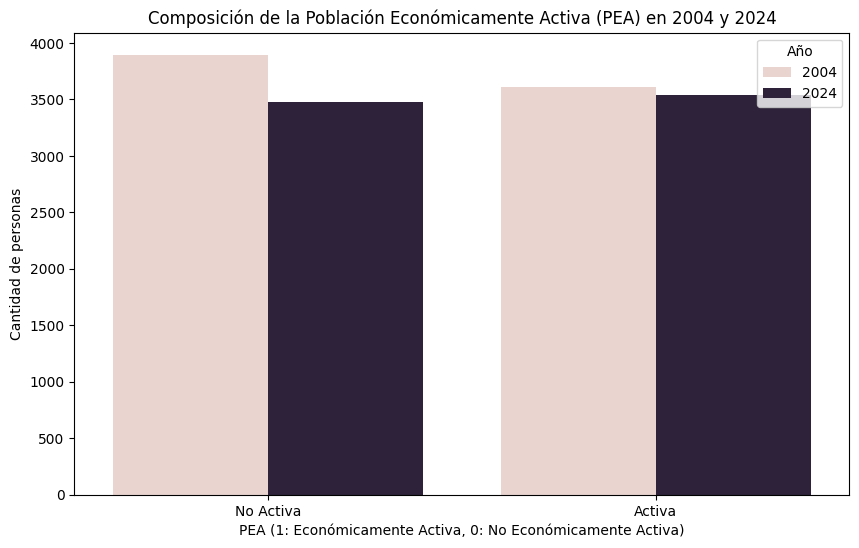

In [58]:
# Agregar la columna 'PEA' (1 si ocupados o desocupados, 0 si inactivos)
respondieron['PEA'] = respondieron['estado'].apply(lambda x: 1 if x in [1, 2] else 0)

# Gráfico de barras mostrando la composición por PEA para 2004 y 2024
# Añadir una columna 'año' para distinguir entre los dos años
respondieron['ano4'] =respondieron['ano4'].astype(int)# Suponiendo que 'ANO4' contiene el año de la observación

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.countplot(x='PEA', hue='ano4', data=respondieron)
plt.title('Composición de la Población Económicamente Activa (PEA) en 2004 y 2024')
plt.xlabel('PEA (1: Económicamente Activa, 0: No Económicamente Activa)')
plt.ylabel('Cantidad de personas')
plt.xticks([0, 1], ['No Activa', 'Activa'])
plt.legend(title='Año')
plt.show()


#### Agreguen a la base respondieron una columna llamada PET (Población en Edad para Trabajar) que tome 1 si están la persona tiene entre 15 y 65 años cumplidos. Realicen un gráfico de barras mostrandola composición por PEA para 2004 y 2024. Comenten los resultados y compare PET con PEA.

C:\Users\gabri\AppData\Local\Temp\ipykernel_20468\2022491847.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  respondieron['PET'] = respondieron['ch06'].apply(lambda x: 1 if 15 <= x <= 65 else 0)
C:\Users\gabri\AppData\Local\Temp\ipykernel_20468\2022491847.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['PET'] = respondieron['ch06'].apply(lambda x: 1 if 15 <= x <= 65 else 0)
C:\Users\gabri\AppData\Local\Temp\ipykernel_20468\2022491847.py:6: SettingWithCopyWarning: 
A value is trying to be set on a 

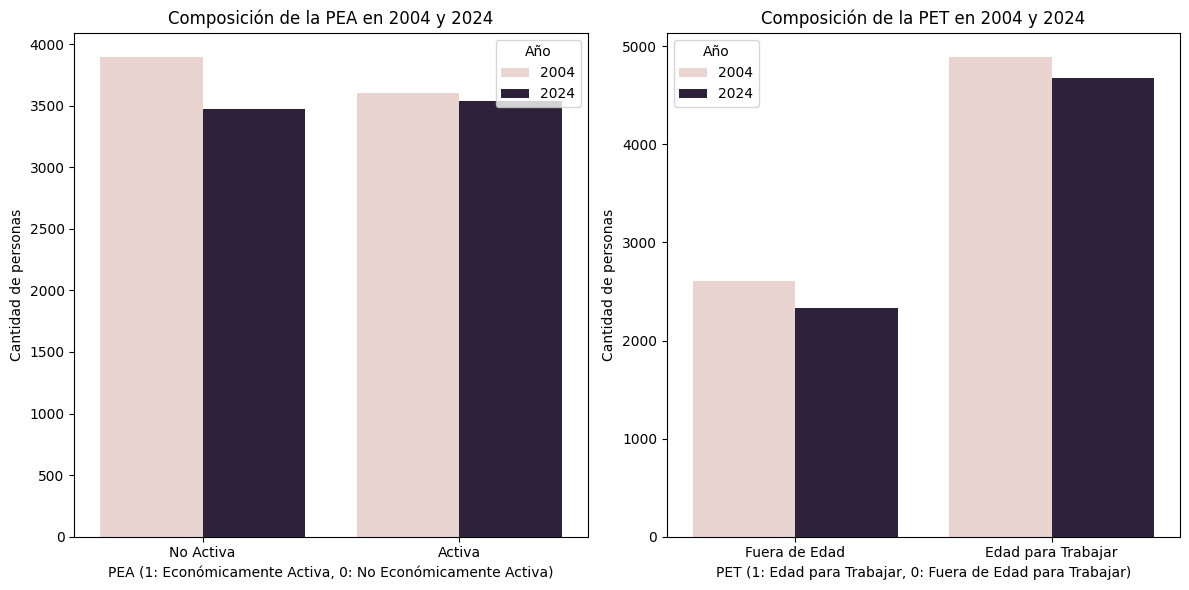

In [60]:

# Agregar la columna 'PET' (1 si la persona tiene entre 15 y 65 años, 0 si no)
respondieron['PET'] = respondieron['ch06'].apply(lambda x: 1 if 15 <= x <= 65 else 0)

# Ya tenemos la columna 'PEA' creada previamente
# Si no, agregarla de nuevo
respondieron['PEA'] = respondieron['estado'].apply(lambda x: 1 if x in [1, 2] else 0)

# Gráfico de barras mostrando la composición por PEA para 2004 y 2024
plt.figure(figsize=(12, 6))

# Gráfico para la PEA
plt.subplot(1, 2, 1)
sns.countplot(x='PEA', hue='ano4', data=respondieron)
plt.title('Composición de la PEA en 2004 y 2024')
plt.xlabel('PEA (1: Económicamente Activa, 0: No Económicamente Activa)')
plt.ylabel('Cantidad de personas')
plt.xticks([0, 1], ['No Activa', 'Activa'])
plt.legend(title='Año')

# Gráfico para la PET
plt.subplot(1, 2, 2)
sns.countplot(x='PET', hue='ano4', data=respondieron)
plt.title('Composición de la PET en 2004 y 2024')
plt.xlabel('PET (1: Edad para Trabajar, 0: Fuera de Edad para Trabajar)')
plt.ylabel('Cantidad de personas')
plt.xticks([0, 1], ['Fuera de Edad', 'Edad para Trabajar'])
plt.legend(title='Año')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

#### 6) Por ultimo, agreguen la base respondieron una columna llamada desocupado que tome 1 si esta desocupada. ¿Cuántas personas están desocupadas en 2004 vs 2024? a. (Opcional) Muestre la proporción de desocupados por nivel educativo comparando 2004 vs 2024. ¿Hubo cambios de desocupados por nivel educativo? b. (Opcional) Cree una variable categórica de años cumplidos (CH06) agrupada de a 10 años. Muestre proporción de desocupados por edad agrupada comparando 2004 vs 2024. ¿Hubo cambios de desocupados por edad?

In [62]:
# Agregar la columna 'desocupado' (1 si la persona está desocupada, 0 si no lo está)
respondieron['desocupado'] = respondieron['estado'].apply(lambda x: 1 if x == 2 else 0)

# Contar cuántas personas están desocupadas en 2004 y 2024
desocupados_2004 = respondieron[(respondieron['ano4'] == 2004) & (respondieron['desocupado'] == 1)].shape[0]
desocupados_2024 = respondieron[(respondieron['ano4'] == 2024) & (respondieron['desocupado'] == 1)].shape[0]

print(f"Personas desocupadas en 2004: {desocupados_2004}")
print(f"Personas desocupadas en 2024: {desocupados_2024}")


Personas desocupadas en 2004: 528
Personas desocupadas en 2024: 311


C:\Users\gabri\AppData\Local\Temp\ipykernel_20468\1267557251.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  respondieron['desocupado'] = respondieron['estado'].apply(lambda x: 1 if x == 2 else 0)
C:\Users\gabri\AppData\Local\Temp\ipykernel_20468\1267557251.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['desocupado'] = respondieron['estado'].apply(lambda x: 1 if x == 2 else 0)


Proporción de desocupados por nivel educativo en 2004:
nivel_ed
1     3.064861
2     6.588670
3     7.798834
4    12.661738
5    13.571429
6     5.564142
7     0.445104
Name: desocupado, dtype: float64

Proporción de desocupados por nivel educativo en 2024:
nivel_ed
1    0.230947
2    4.729730
3    3.917379
4    8.119925
5    6.971429
6    2.540835
7    0.000000
Name: desocupado, dtype: float64


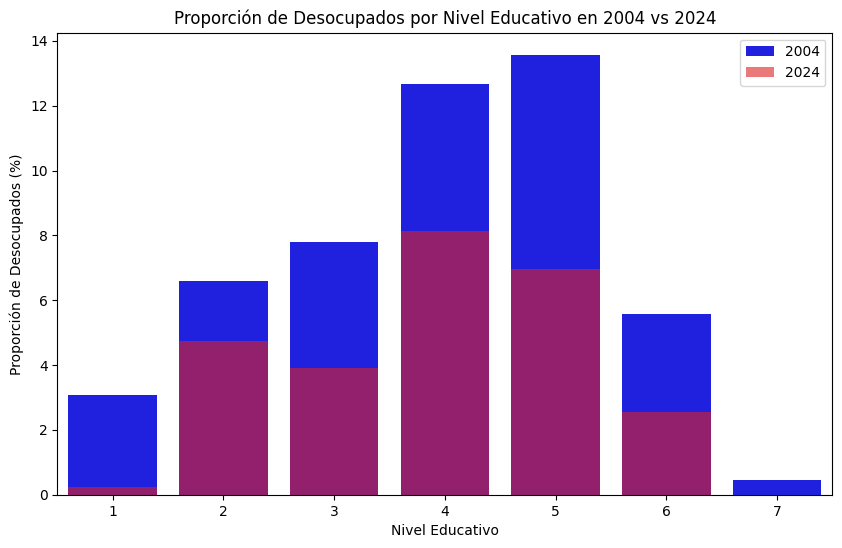

In [63]:
# Calcular la proporción de desocupados por nivel educativo para 2004 y 2024
nivel_educativo_2004 = respondieron[respondieron['ano4'] == 2004].groupby('nivel_ed')['desocupado'].mean() * 100
nivel_educativo_2024 = respondieron[respondieron['ano4'] == 2024].groupby('nivel_ed')['desocupado'].mean() * 100

# Mostrar los resultados
print("Proporción de desocupados por nivel educativo en 2004:")
print(nivel_educativo_2004)
print("\nProporción de desocupados por nivel educativo en 2024:")
print(nivel_educativo_2024)

# Gráfico de barras para comparar
plt.figure(figsize=(10, 6))
sns.barplot(x=nivel_educativo_2004.index, y=nivel_educativo_2004.values, color='blue', label='2004')
sns.barplot(x=nivel_educativo_2024.index, y=nivel_educativo_2024.values, color='red', alpha=0.6, label='2024')
plt.title('Proporción de Desocupados por Nivel Educativo en 2004 vs 2024')
plt.xlabel('Nivel Educativo')
plt.ylabel('Proporción de Desocupados (%)')
plt.legend()
plt.show()


C:\Users\gabri\AppData\Local\Temp\ipykernel_20468\3853119122.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  respondieron['edad_grupos'] = pd.cut(respondieron['ch06'], bins=range(0, 101, 10), right=False)
C:\Users\gabri\AppData\Local\Temp\ipykernel_20468\3853119122.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['edad_grupos'] = pd.cut(respondieron['ch06'], bins=range(0, 101, 10), right=False)
C:\Users\gabri\AppData\Local\Temp\ipykernel_20468\3853119122.py:5: FutureWarning: The default of observed

Proporción de desocupados por grupos de edad en 2004:
edad_grupos
[0, 10)       0.000000
[10, 20)      6.973180
[20, 30)     15.297907
[30, 40)      8.713273
[40, 50)      5.902004
[50, 60)      8.823529
[60, 70)      5.769231
[70, 80)      1.793722
[80, 90)      0.529101
[90, 100)     0.000000
Name: desocupado, dtype: float64

Proporción de desocupados por grupos de edad en 2024:
edad_grupos
[0, 10)       0.000000
[10, 20)      3.355079
[20, 30)     11.354582
[30, 40)      4.826038
[40, 50)      6.295908
[50, 60)      3.919240
[60, 70)      3.092784
[70, 80)      0.790514
[80, 90)      0.000000
[90, 100)     0.000000
Name: desocupado, dtype: float64


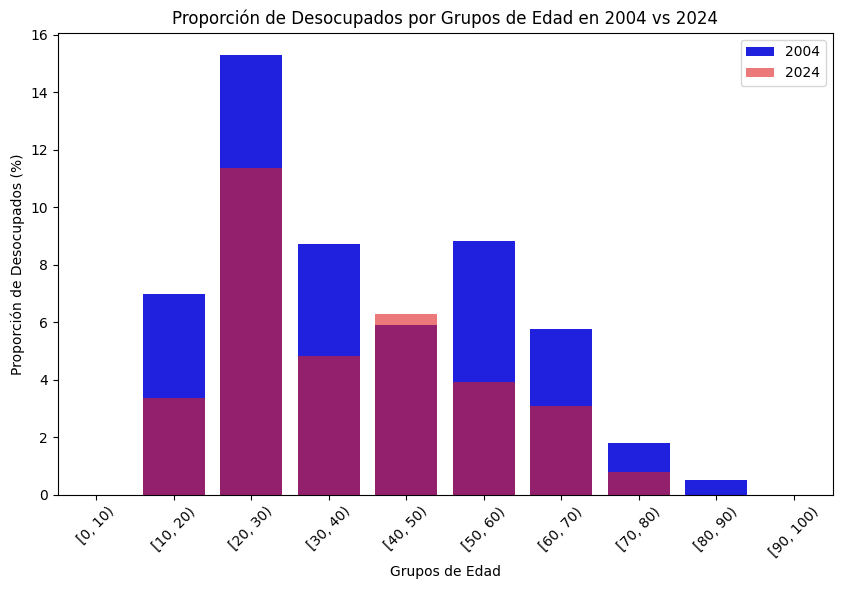

In [65]:
# Crear una variable categórica de edad agrupada por décadas (intervalos de 10 años)
respondieron['edad_grupos'] = pd.cut(respondieron['ch06'], bins=range(0, 101, 10), right=False)

# Calcular la proporción de desocupados por grupos de edad en 2004 y 2024
edad_grupos_2004 = respondieron[respondieron['ano4'] == 2004].groupby('edad_grupos')['desocupado'].mean() * 100
edad_grupos_2024 = respondieron[respondieron['ano4'] == 2024].groupby('edad_grupos')['desocupado'].mean() * 100

# Mostrar los resultados
print("Proporción de desocupados por grupos de edad en 2004:")
print(edad_grupos_2004)
print("\nProporción de desocupados por grupos de edad en 2024:")
print(edad_grupos_2024)

# Gráfico de barras para comparar
plt.figure(figsize=(10, 6))
sns.barplot(x=edad_grupos_2004.index.astype(str), y=edad_grupos_2004.values, color='blue', label='2004')
sns.barplot(x=edad_grupos_2024.index.astype(str), y=edad_grupos_2024.values, color='red', alpha=0.6, label='2024')
plt.title('Proporción de Desocupados por Grupos de Edad en 2004 vs 2024')
plt.xlabel('Grupos de Edad')
plt.ylabel('Proporción de Desocupados (%)')
plt.legend()
plt.xticks(rotation=45)
plt.show()


#### Ejercicio 7

In [97]:
# Filtrar los datos de Tucumán (Suponiendo que el código de aglomerado para Tucumán es 29)
tucuman_2004 = EPH2004[(EPH2004['ano4'] == 2004) & (EPH2004["aglomerado"] == 29)]
tucuman_2024 = EPH2024[(EPH2024['ano4'] == 2024) & (EPH2024['aglomerado'] == 29)]
print(tucuman_2004)
# Calcular la tasa de desocupación según INDEC (Desocupados / PEA)
#def calcular_tasa_desocupacion(df):
 #   desocupados = df[df['desocupado'] == 1].shape[0]
 #   PEA = df[df['PEA'] == 1].shape[0]
 #   return (desocupados / PEA) * 100 if PEA > 0 else 0

#tasa_desocupacion_indec_2004 = calcular_tasa_desocupacion(tucuman_2004)
#tasa_desocupacion_indec_2024 = calcular_tasa_desocupacion(tucuman_2024)

# Calcular la tasa de desocupación alternativa (Desocupados / PET)
#def calcular_tasa_desocupacion_alternativa(df):
#    desocupados = df[df['desocupado'] == 1].shape[0]
#    PET = df[df['PET'] == 1].shape[0]
#    return (desocupados / PET) * 100 if PET > 0 else 0

#tasa_desocupacion_alt_2004 = calcular_tasa_desocupacion_alternativa(tucuman_2004)
#tasa_desocupacion_alt_2024 = calcular_tasa_desocupacion_alternativa(tucuman_2024)

# Crear un DataFrame para mostrar los resultados
#resultados = pd.DataFrame({
#    'Año': [2004, 2024],
#    'Tasa INDEC (%)': [tasa_desocupacion_indec_2004, tasa_desocupacion_indec_2024],
#    'Tasa Alternativa (%)': [tasa_desocupacion_alt_2004, tasa_desocupacion_alt_2024]
#})

# Mostrar los resultados
#print(resultados)

# Graficar los resultados
#resultados.set_index('Año').plot(kind='bar', figsize=(10, 6))
#plt.title('Tasa de Desocupación en Tucumán (2004 vs 2024)')
#plt.ylabel('Tasa de Desocupación (%)')
#plt.xticks(rotation=0)
#plt.legend(['Tasa INDEC', 'Tasa Alternativa'])
#plt.show()

Empty DataFrame
Columns: [codusu, nro_hogar, componente, h15, ano4, trimestre, region, mas_500, aglomerado, pondera, ch03, ch04, ch06, ch07, ch08, ch09, ch10, ch11, ch12, ch13, ch14, ch15, ch15_cod, ch16, ch16_cod, nivel_ed, estado, cat_ocup, cat_inac, pp02c1, pp02c2, pp02c3, pp02c4, pp02c5, pp02c6, pp02c7, pp02c8, pp02e, pp02h, pp02i, pp03c, pp03d, pp3e_tot, pp3f_tot, pp03g, pp03h, pp03i, pp03j, intensi, pp04a, pp04b_cod, pp04b1, pp04b2, pp04b3_mes, pp04b3_ano, pp04b3_dia, pp04c, pp04c99, pp04d_cod, pp04g, pp05b2_mes, pp05b2_ano, pp05b2_dia, pp05c_1, pp05c_2, pp05c_3, pp05e, pp05f, pp05h, pp06a, pp06c, pp06d, pp06e, pp06h, pp07a, pp07c, pp07d, pp07e, pp07f1, pp07f2, pp07f3, pp07f4, pp07f5, pp07g1, pp07g2, pp07g3, pp07g4, pp07g_59, pp07h, pp07i, pp07j, pp07k, pp08d1, pp08d4, pp08f1, pp08f2, pp08j1, pp08j2, pp08j3, pp09a, ...]
Index: []

[0 rows x 176 columns]


## Parte 2: Clasificación

#### 1) Para cada año, partan la base respondieron en una base de prueba (test) y una de entrenamiento (train) utilizando el comando train_test_split. La base de entrenamiento debe comprender el 70% de los datos, y la semilla a utilizar (random state instance) debe ser 101. Establezca a desocupado como su variable dependiente en la base de entrenamiento (vector y). El resto de las variables serán las variables independientes (matriz X). Recuerden agregar la columna de unos (1).

In [85]:
respondieron['mas_500'] = 1

C:\Users\gabri\AppData\Local\Temp\ipykernel_20468\3167779742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['mas_500'] = 1


In [84]:

respondieron['mas_500'].value_counts()

mas_500
S    14512
Name: count, dtype: int64

In [86]:
from sklearn.model_selection import train_test_split
import numpy as np

# Filtrar los datos por cada año
data_2004 = respondieron[respondieron['ano4'] == 2004]
data_2024 = respondieron[respondieron['ano4'] == 2024]

# Definir las variables independientes (X) y dependientes (y) para cada año
# Excluir la columna 'desocupado' de las variables independientes
X_2004 = data_2004.drop(columns=['desocupado', 'ano4'])  # Eliminar 'desocupado' y 'año'
y_2004 = data_2004['desocupado']  # Variable dependiente

X_2024 = data_2024.drop(columns=['desocupado', 'ano4'])  # Eliminar 'desocupado' y 'año'
y_2024 = data_2024['desocupado']  # Variable dependiente

# Añadir la columna de unos (1) a las variables independientes (matriz X)
X_2004 = np.hstack([np.ones((X_2004.shape[0], 1)), X_2004])  # Añadir columna de unos en el eje 1
X_2024 = np.hstack([np.ones((X_2024.shape[0], 1)), X_2024])  # Añadir columna de unos en el eje 1

# Dividir los datos en conjuntos de entrenamiento (70%) y prueba (30%) usando train_test_split
# Utilizar random_state=101 para asegurar reproducibilidad
X_train_2004, X_test_2004, y_train_2004, y_test_2004 = train_test_split(X_2004, y_2004, test_size=0.3, random_state=101)
X_train_2024, X_test_2024, y_train_2024, y_test_2024 = train_test_split(X_2024, y_2024, test_size=0.3, random_state=101)

# Mostrar los tamaños de los conjuntos de entrenamiento y prueba
print(f"Tamaño del conjunto de entrenamiento para 2004: {X_train_2004.shape[0]}")
print(f"Tamaño del conjunto de prueba para 2004: {X_test_2004.shape[0]}")
print(f"Tamaño del conjunto de entrenamiento para 2024: {X_train_2024.shape[0]}")
print(f"Tamaño del conjunto de prueba para 2024: {X_test_2024.shape[0]}")


Tamaño del conjunto de entrenamiento para 2004: 5251
Tamaño del conjunto de prueba para 2004: 2251
Tamaño del conjunto de entrenamiento para 2024: 4907
Tamaño del conjunto de prueba para 2024: 2103


#### 2

In [87]:
from sklearn.model_selection import train_test_split
import numpy as np

# Filtrar los datos por cada año
data_2004 = respondieron[respondieron['ano4'] == 2004]
data_2024 = respondieron[respondieron['ano4'] == 2024]

# Definir las variables independientes (X) y dependientes (y) para cada año
# Excluir la columna 'desocupado' de las variables independientes
X_2004 = data_2004.drop(columns=['desocupado', 'ano4',"codusu", ""])  # Eliminar 'desocupado' y 'año'
y_2004 = data_2004['desocupado']  # Variable dependiente

X_2024 = data_2024.drop(columns=['desocupado', 'ano4', "codusu"])  # Eliminar 'desocupado' y 'año'
y_2024 = data_2024['desocupado']  # Variable dependiente

# Añadir la columna de unos (1) a las variables independientes (matriz X)
X_2004 = np.hstack([np.ones((X_2004.shape[0], 1)), X_2004])  # Añadir columna de unos en el eje 1
X_2024 = np.hstack([np.ones((X_2024.shape[0], 1)), X_2024])  # Añadir columna de unos en el eje 1

# Dividir los datos en conjuntos de entrenamiento (70%) y prueba (30%) usando train_test_split
# Utilizar random_state=101 para asegurar reproducibilidad
X_train_2004, X_test_2004, y_train_2004, y_test_2004 = train_test_split(X_2004, y_2004, test_size=0.3, random_state=101)
X_train_2024, X_test_2024, y_train_2024, y_test_2024 = train_test_split(X_2024, y_2024, test_size=0.3, random_state=101)

# Mostrar los tamaños de los conjuntos de entrenamiento y prueba
print(f"Tamaño del conjunto de entrenamiento para 2004: {X_train_2004.shape[0]}")
print(f"Tamaño del conjunto de prueba para 2004: {X_test_2004.shape[0]}")
print(f"Tamaño del conjunto de entrenamiento para 2024: {X_train_2024.shape[0]}")
print(f"Tamaño del conjunto de prueba para 2024: {X_test_2024.shape[0]}")


Tamaño del conjunto de entrenamiento para 2004: 5251
Tamaño del conjunto de prueba para 2004: 2251
Tamaño del conjunto de entrenamiento para 2024: 4907
Tamaño del conjunto de prueba para 2024: 2103


In [88]:
##Para 2024 simplificado
# Regresión Logística para 2024
modelo_log = LogisticRegression()
evaluar_modelo(modelo_log, X_train_2024, X_test_2024, y_train_2024, y_test_2024, 'Regresión Logística - 2024')

# Análisis Discriminante Lineal para 2024
modelo_lda = LinearDiscriminantAnalysis()
evaluar_modelo(modelo_lda, X_train_2024, X_test_2024, y_train_2024, y_test_2024, 'Análisis Discriminante Lineal - 2024')

# KNN con k=3 para 2024
modelo_knn = KNeighborsClassifier(n_neighbors=3)
evaluar_modelo(modelo_knn, X_train_2024, X_test_2024, y_train_2024, y_test_2024, 'KNN (k=3) - 2024')

# Naive Bayes para 2024
modelo_nb = GaussianNB()
evaluar_modelo(modelo_nb, X_train_2024, X_test_2024, y_train_2024, y_test_2024, 'Naive Bayes - 2024')


TypeError: float() argument must be a string or a real number, not 'datetime.datetime'

In [74]:
#Para 2024 completo
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Función para graficar la curva ROC
def plot_roc_curve(y_test, y_pred_prob, model_name):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title(f'Curva ROC - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Función para evaluar un modelo y reportar métricas
def evaluar_modelo(modelo, X_train, X_test, y_train, y_test, nombre_modelo):
    # Entrenar el modelo
    modelo.fit(X_train, y_train)
    
    # Predecir en los datos de prueba
    y_pred = modelo.predict(X_test)
    y_pred_prob = modelo.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva
    
    # Calcular las métricas
    matriz_confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    auc_valor = roc_auc_score(y_test, y_pred_prob)
    
    # Reportar resultados
    print(f"Modelo: {nombre_modelo}")
    print(f"Exactitud (Accuracy): {accuracy:.2f}")
    print(f"AUC: {auc_valor:.2f}")
    print("Matriz de Confusión:")
    print(matriz_confusion)
    
    # Graficar la curva ROC
    plot_roc_curve(y_test, y_pred_prob, nombre_modelo)

# Preparar datos para entrenamiento y prueba (ya divididos previamente para 2024)
# X_train_2024, X_test_2024, y_train_2024, y_test_2024

# Regresión Logística para 2024
modelo_log = LogisticRegression()
evaluar_modelo(modelo_log, X_train_2024, X_test_2024, y_train_2024, y_test_2024, 'Regresión Logística - 2024')

# Análisis Discriminante Lineal para 2024
modelo_lda = LinearDiscriminantAnalysis()
evaluar_modelo(modelo_lda, X_train_2024, X_test_2024, y_train_2024, y_test_2024, 'Análisis Discriminante Lineal - 2024')

# KNN con k=3 para 2024
modelo_knn = KNeighborsClassifier(n_neighbors=3)
evaluar_modelo(modelo_knn, X_train_2024, X_test_2024, y_train_2024, y_test_2024, 'KNN (k=3) - 2024')

# Naive Bayes para 2024
modelo_nb = GaussianNB()
evaluar_modelo(modelo_nb, X_train_2024, X_test_2024, y_train_2024, y_test_2024, 'Naive Bayes - 2024')


ValueError: could not convert string to float: 'S'